## Sobel

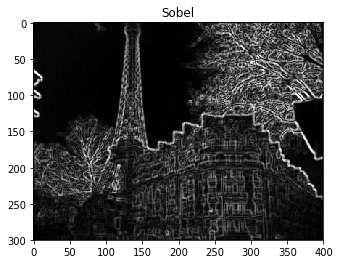

In [2]:
%matplotlib inline

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plot
import numpy as np

scale = 1
delta = 0
ddepth = cv2.CV_16S

image = cv2.imread("image.jpg", 0)
image = cv2.GaussianBlur(image,(3,3),0)

# Gradient-X
grad_x = cv2.Sobel(image, ddepth, 1, 0, ksize=3, scale=scale,
                   delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
grad_y = cv2.Sobel(image, ddepth, 0, 1, ksize=3, scale=scale,
                   delta=delta, borderType=cv2.BORDER_DEFAULT)
# converting back to uint8
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
sobel_img = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)

plot.imshow(sobel_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Sobel')
plot.show()

## Roberts

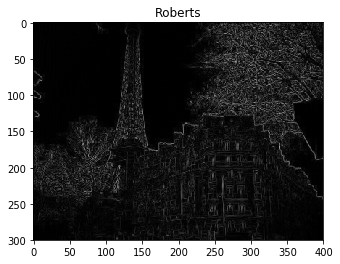

In [3]:
img = cv2.imread("image.jpg", 0)

kernel_x = np.matrix([[1, 0],[0, -1]])
kernel_y = np.matrix([[0, 1],[-1, 0]])
# Gradient-X
grad_x = cv2.filter2D(img, ddepth,kernel_x,
                      delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
grad_y = cv2.filter2D(img, ddepth,kernel_y,
                      delta=delta, borderType=cv2.BORDER_DEFAULT)
# converting back to uint8
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
roberts_img = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5,0)

plot.imshow(roberts_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Roberts')
plot.show()

Diferentemente do Roberts, o algoritmo de Sobel utiliza uma suavização gaussiana antes de aplicar seu próprio algoritmo de detecção de bordas, fazendo assim, com que as bordas fiquem mais definidas.

### Calculando a média do erro quadrado entre Sobel e Roberts

In [7]:
def MSE(original_img, new_img):
    img_error = np.sum((original_img - new_img) ** 2)
    img_error /= float(original_img.size)
    return img_error

dif = MSE(sobel_img, roberts_img)
print 'Comparação entre as duas imagens'
print 'MSE: ', dif

Comparação entre as duas imagens
MSE:  71.2690416667


### Filtro 3x3 passa baixa

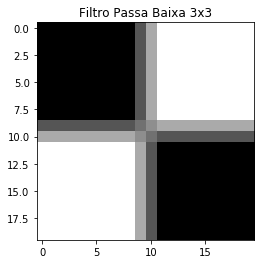

In [52]:
img_custom = np.matrix([[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]],
                      np.uint8)

kernel_3x3 = filter_7 = np.ones((3,3), np.float32) / 9.

filtered_img = cv2.filter2D(img_custom, -1, kernel_3x3)

plot.imshow(filtered_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Filtro Passa Baixa 3x3')
plot.show()

### Filtro 7x7 passa baixa

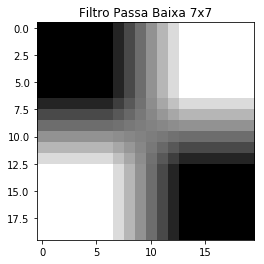

In [53]:
kernel_7x7 = np.ones((7,7), np.float32) / 49.

filtered_img = cv2.filter2D(img_custom, -1, kernel_7x7)

plot.imshow(filtered_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Filtro Passa Baixa 7x7')
plot.show()

O filtro 3x3 passa baixa utiliza apenas os pixels diretamente a volta do pixel referência para a operação, desta maneira somente estes pixels interferem no resultado final, ou seja, somente um pixel acima, abaixo, a esquerda e a direita do pixel referência são afetados e mudam de intensidade.
Já no filtro 7x7 passa baixa, 3 pixels acima, abaixo, a esquerda e a direita de cada pixel referência participam da operação, desta maneira, alterando suas respectivas intensidades.

### Aplicando o filtro Norte

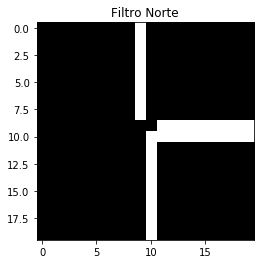

In [54]:
kernel_north = np.matrix([[ 1,  1,  1],
                          [ 1, -2,  1],
                          [-1, -1, -1]])

filtered_img = cv2.filter2D(img_custom, -1, kernel_north)

plot.imshow(filtered_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Filtro Norte')
plot.show()

### Aplicando o filtro Sul

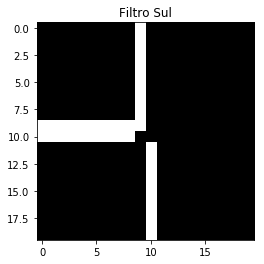

In [55]:
kernel_south = np.matrix([[-1, -1, -1],
                          [ 1, -2,  1],
                          [ 1,  1,  1]])

filtered_img = cv2.filter2D(img_custom, -1, kernel_south)

plot.imshow(filtered_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Filtro Sul')
plot.show()

### Aplicando o filtro Leste

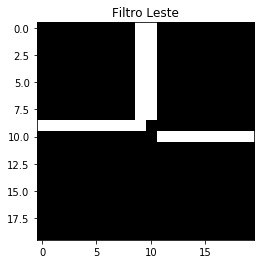

In [59]:
kernel_east = np.matrix([[-1,  1,  1],
                         [-1, -2,  1],
                         [-1,  1,  1]])

filtered_img = cv2.filter2D(img_custom, -1, kernel_east)

plot.imshow(filtered_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Filtro Leste')
plot.show()

### Aplicando o filtro Sudeste

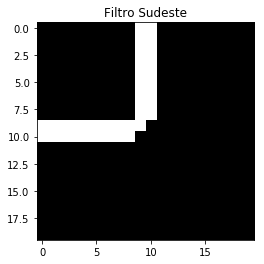

In [60]:
kernel_southeast = np.matrix([[-1, -1,  1],
                              [-1, -2,  1],
                              [ 1,  1,  1]])

filtered_img = cv2.filter2D(img_custom, -1, kernel_southeast)

plot.imshow(filtered_img, cmap=plot.get_cmap('gray'), vmin=0, vmax=255)
plot.title('Filtro Sudeste')
plot.show()